## Problem Information

We are provided with a dataset for loan details of money borrowers from Lending Club. It is important to identify and predict if borrowers paid back loans in full or not. The dataset is originally from the Lending Club [here](https://www.lendingclub.com/info/download-data.action) but already refined by Jose Portella to be free of null values [here](https://www.udemy.com/share/101WaU3@t1Dn3NjLD3OchinqvoeiIBfcJqrSgk_DGBpKeOo3z569lG5br-eKlQWdX-7ZroH8/)

The description of the columns contained in the dataset is as follows:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
credit = pd.read_csv("loan_data.csv")

In [3]:
#Examine general information of dataset

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
credit.describe()

#From the mean values, we could already get an insight into the average amount of or creditors that pay back their loans and the average of other features that contributes to that

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
credit.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
credit.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### Data Feature Engineering

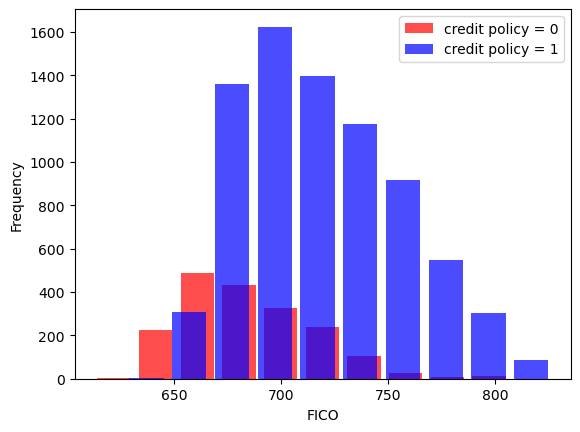

In [7]:
#How does the FICO credit score influence the credit policy of borrowers

credit[credit["credit.policy"] == 0]["fico"].plot.hist(alpha = 0.7, color = "red", rwidth = 0.8, label = "credit policy = 0")
credit[credit["credit.policy"] == 1]["fico"].plot.hist(alpha = 0.7, color = "blue", rwidth = 0.8, label = "credit policy = 1")
plt.xlabel("FICO")
plt.legend()

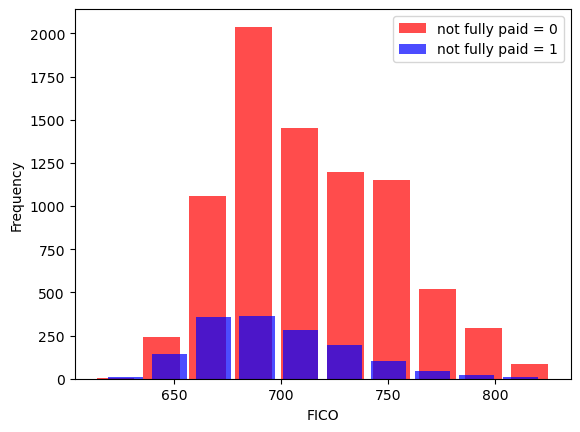

In [8]:
#How does FICO score influence the possibility of paying back loans?

credit[credit["not.fully.paid"] == 0]["fico"].plot.hist(alpha = 0.7, color = "red", rwidth = 0.8, label = "not fully paid = 0")
credit[credit["not.fully.paid"] == 1]["fico"].plot.hist(alpha = 0.7, color = "blue", rwidth = 0.8, label = "not fully paid = 1")
plt.xlabel("FICO")
plt.legend()

In [9]:
credit["fico"].nunique()

44

Text(0.5, 0, 'Purpose')

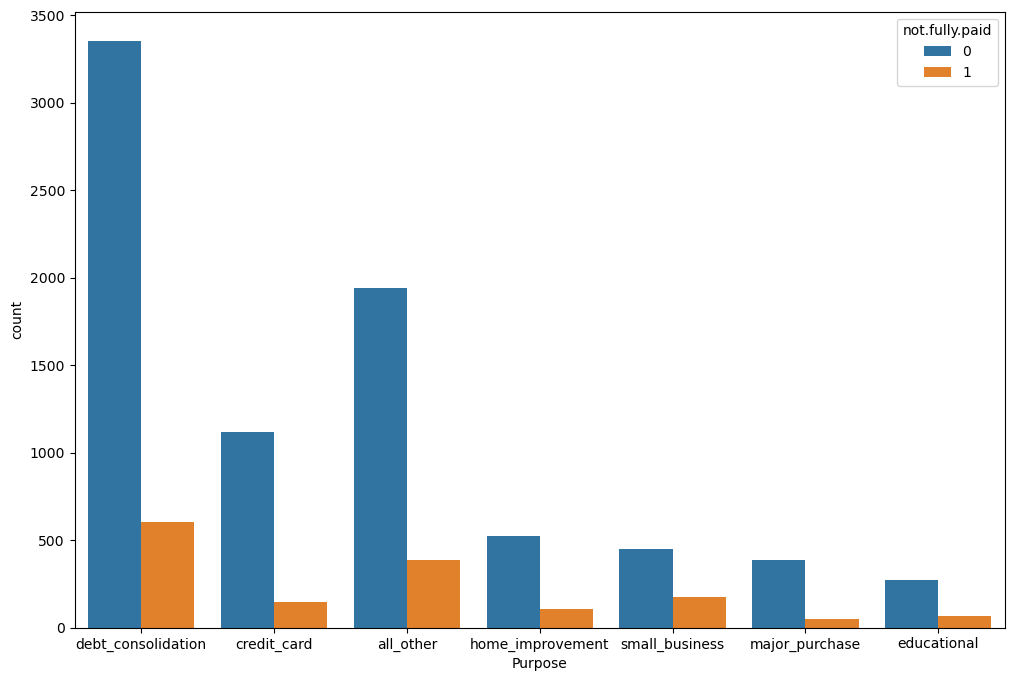

In [10]:
#For what purposes, are loans are difficult to pay back?

plt.figure(figsize = (12, 8))
sns.countplot(x = "purpose", data = credit, hue = "not.fully.paid")
plt.xlabel("Purpose")

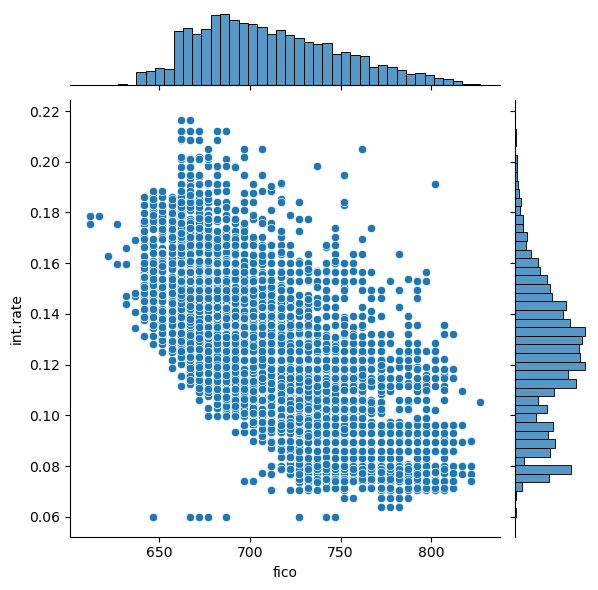

In [11]:
#What is the correlation between fico and interest rate

sns.jointplot(x = "fico", y = "int.rate", data = credit)

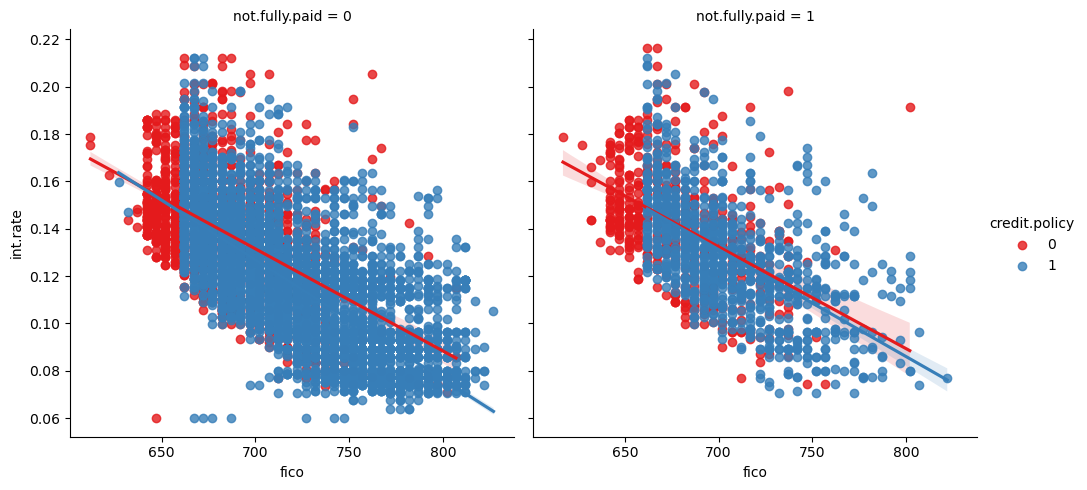

In [12]:
#We interestingly observe a decrease in interest rate with increasing FICO
#Examine similar relation for the possibility of paying back the loan

sns.lmplot(x = "fico", y = "int.rate", data = credit, palette = "Set1", hue = "credit.policy", col = "not.fully.paid")

In [13]:
credit.isnull().sum()

#Just to reascertain the absence of null values

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [14]:
#Are there columns containing string values?

credit.select_dtypes(include = "object").columns

Index(['purpose'], dtype='object')

In [15]:
#How many unique values are present in our string column

credit["purpose"].nunique()

7

In [16]:
#We could convert our string column into dummies

purpose_dummies = pd.get_dummies(credit["purpose"], drop_first = True)
credit.drop("purpose", axis = 1, inplace = True)
credit = pd.concat([credit, purpose_dummies], axis = 1)

In [17]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  not.fully.paid      9578 non-null   int64  
 13  credit_card         9578 non-null   uint8  
 14  debt_consolidation  9578 non-null   uint8  
 15  educational         9578 non-null   uint8  
 16  home_i

In [18]:
credit.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

### Model Development

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = credit.drop("not.fully.paid", axis = 1)

y = credit["not.fully.paid"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
dtree_predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [28]:
print(confusion_matrix(y_test, dtree_predictions))

[[1995  436]
 [ 337  106]]


In [29]:
#Let's do a visualization of the tree we produced

from sklearn import tree

In [30]:
text_rep = tree.export_text(dtree)

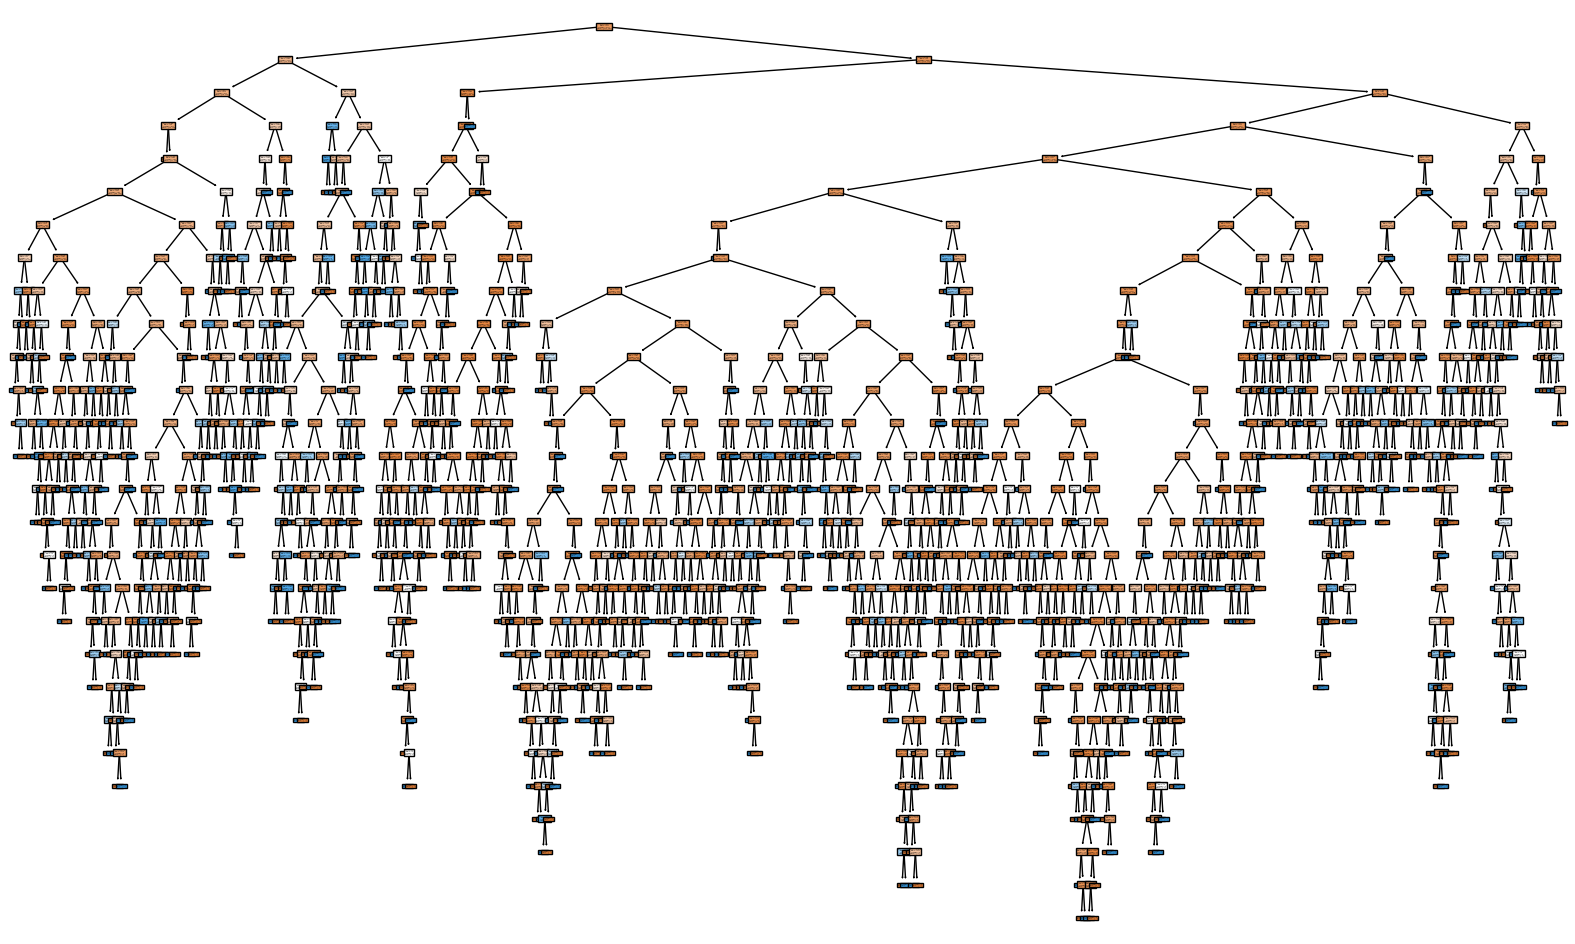

In [31]:
plt.figure(figsize = (20, 12))
dtree_plot = tree.plot_tree(dtree, filled = True)

### Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators = 500)

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [35]:
rfc_predictions = rfc.predict(X_test)

In [36]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.47      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



#### We could make a better classification and prediction of our dataset with random forest classifier

In [37]:
print(confusion_matrix(y_test, rfc_predictions))

[[2421   10]
 [ 434    9]]


In [38]:
tree_matrix = confusion_matrix(y_test, dtree_predictions)
forest_matrix = confusion_matrix(y_test, rfc_predictions)

<Figure size 1200x600 with 0 Axes>

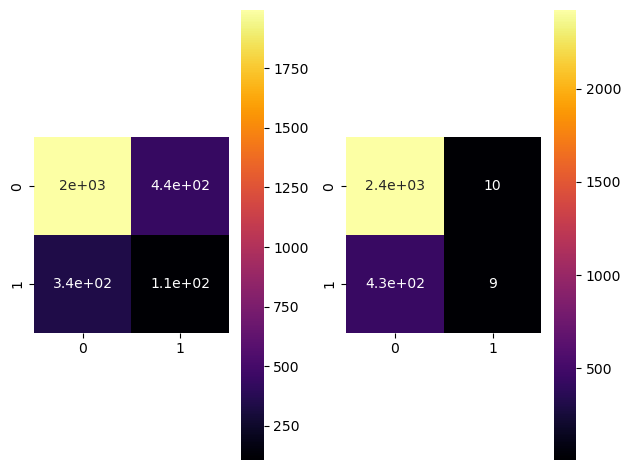

In [39]:
plt.figure(figsize = (12, 6))
fig, axes = plt.subplots(1,2)
sns.heatmap(data = tree_matrix, annot = True, cmap = "inferno", ax = axes[0], square = True)
sns.heatmap(data = forest_matrix, annot = True, cmap = "inferno", ax = axes[1], square = True)
plt.tight_layout()